In [18]:
import numpy as np
import pandas as pd

from gensim.models import KeyedVectors
from scipy.spatial.distance import cosine
from tqdm import tqdm_notebook

from sources import parse_glove_vocab

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [20]:
pd.options.display.max_rows = 1000

In [21]:
m1 = KeyedVectors.load_word2vec_format('../data/corpora/regions/northeast.w2v.txt')

In [22]:
m2 = KeyedVectors.load_word2vec_format('../data/corpora/regions/south.w2v.txt')

In [23]:
combined = KeyedVectors.load_word2vec_format('../data/corpora/regions/combined.w2v.txt')

In [24]:
v1 = parse_glove_vocab('../data/corpora/regions/northeast.vocab.txt')

In [25]:
v2 = parse_glove_vocab('../data/corpora/regions/south.vocab.txt')

In [26]:
v1_total = sum(v1.values())

In [27]:
v2_total = sum(v2.values())

In [29]:
vocab = parse_glove_vocab('../data/corpora/regions/vocab.txt')

In [30]:
def neighbor_sim(token, topn=50):
    g1 = [t for t, _ in m1.most_similar(token, topn=topn)]
    g2 = [t for t, _ in m2.most_similar(token, topn=topn)]
    return combined.n_similarity(g1, g2)

In [31]:
neighbor_sim('earth')

0.91948654128971818

In [32]:
data = []
for token in tqdm_notebook(vocab.keys()):
    
    score = neighbor_sim(token)
    
    c1 = v1[token] / v1_total
    c2 = v2[token] / v2_total

    cr = min([c1, c2]) / max([c1, c2])
    
    data.append((token, vocab[token], v1[token], v2[token], cr, score))

HBox(children=(IntProgress(value=0, max=8678), HTML(value='')))

In [33]:
df = pd.DataFrame(data, columns=('token', 'total_count', 'count1', 'count1', 'count_ratio', 'score'))

In [41]:
df[(df['count_ratio'] > 0.8) & (df['total_count'] > 1e5)].sort_values('score').head(100)

,token,total_count,count1,count1,count_ratio,score
1720,moves,200523,27254,84708,0.834177,-0.040034
1757,form,194210,32344,73442,0.875787,0.041535
1707,address,203140,28342,84491,0.869706,0.271660
2748,status,118401,17337,47289,0.950530,0.421166
3011,sec,105804,17435,49084,0.920946,0.423531
2262,draw,146999,20372,57199,0.923416,0.425680
2265,struggle,146856,20027,59920,0.866555,0.428866
318,left,1253938,201198,485595,0.930890,0.449963
2935,wrap,109052,14340,46233,0.804173,0.463548
2569,iron,128185,16279,52618,0.802132,0.479837


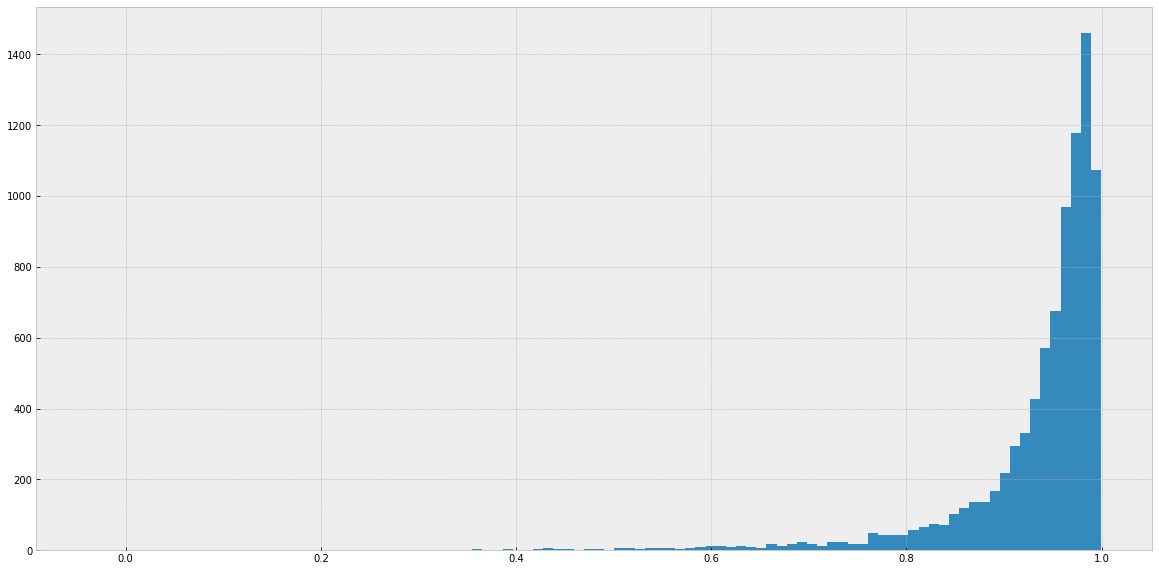

In [35]:
plt.figure(figsize=(20, 10))
_ = plt.hist(df['score'], bins=100)

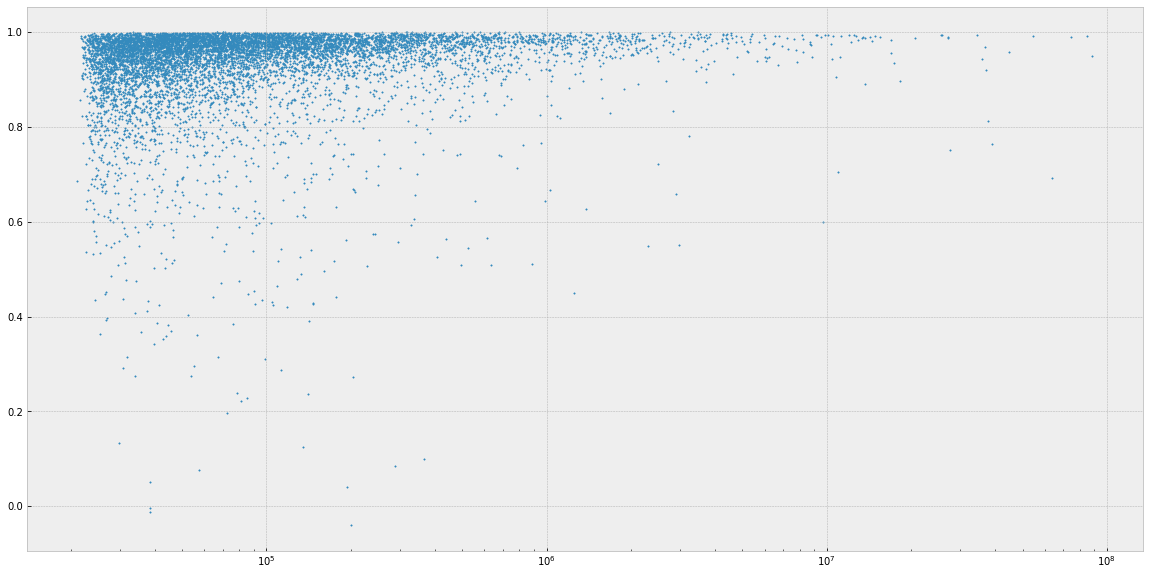

In [36]:
plt.figure(figsize=(20, 10))
plt.xscale('log')
plt.scatter(df['total_count'], df['score'], s=2)

In [37]:
def compare(token):
    for t, _ in m1.most_similar(token, topn=20):
        print(t)
    print('\n')
    for t, _ in m2.most_similar(token, topn=20):
        print(t)

In [43]:
compare('struggle')

struggles
everyday
wanting
difficult
constant
struggling
overcome
maintaining
finding
maintain
knowing
splash
relate
basis
sometimes
understand
often
life
strength
thrive


struggles
bug
confusion
tackle
bite
everyday
combat
iv
moves
cp
power
hyper
earthquake
counter
until
overcome
form
zen
sometimes
unknown
